
# DESC SN Ia metric # 

# u/pgris/nsnmetric  gamma_WFD.hdf5 #

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = 'shave_25_v2.1_10yrs.db' #get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

shave_25_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 2
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(verbose=False, gammaName='gamma_WFD.hdf5')  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict, 
                        summaryMetrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=2, approximate resolution 1758.969043 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 62322 799 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 72709 799 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading

Querying table None with no constraint for columns ['observationId', 'fieldDec', 'numExposures', 'night', 'observationStartMJD', 'visitExposureTime', 'fieldRA', 'visitTime', 'filter', 'rotSkyPos', 'fiveSigmaDepth'].
Found 2383592 visits
Running:  ['sn']
Completed metric generation.
Running reduce methods.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
runtime= 772.1724700927734 s


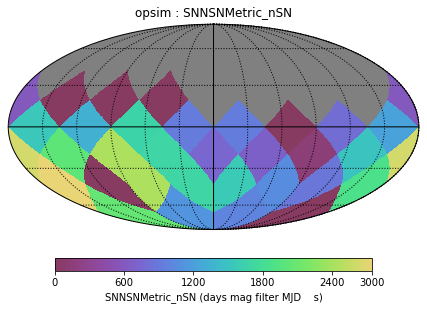

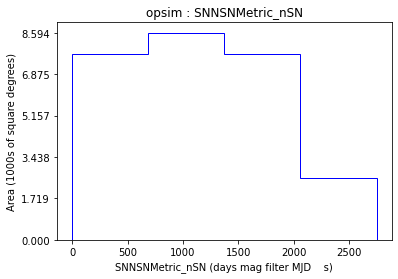

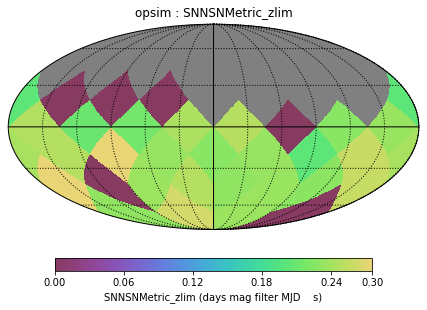

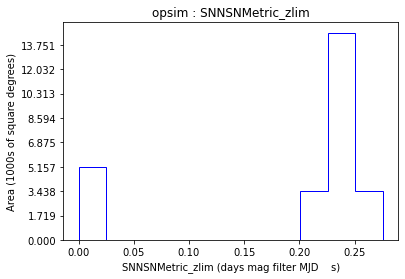

In [5]:
t1 = time.time()
bg.runAll()     
t2 = time.time()
bg.plotAll(closefigs=False)
print('runtime=', t2-t1, 's')

In [6]:
bundle.metricValues.compressed()[0]

rec.array([(0., 0.)],
          dtype=[('nSN', '<f8'), ('zlim', '<f8')])

In [7]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fbb974b5700>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fbb8f02ad90>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fbb17cb4820>}

In [8]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
print(bdict['SNNSNMetric_nSN'].metricValues.compressed())
np.median(bdict['SNNSNMetric_nSN'].metricValues.compressed())

[   0.          0.          0.        590.613141  925.280834 1668.013067
 1333.434565 1537.978516 1228.589809  803.709614    0.        943.363067
  730.080543 1701.649994 2445.215294 2009.592507 2636.94783  1498.834786
  134.47867   675.913483 1697.79846  2443.943836    0.       3130.391541
 1876.653359  885.028012 1054.542918 1572.922491 1116.439394 2053.381145
    0.        987.958596]


1085.491156

In [9]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()

array([0.       , 0.       , 0.       , 0.202477 , 0.2438055, 0.215684 ,
       0.2103015, 0.246814 , 0.233842 , 0.2269875, 0.       , 0.249465 ,
       0.226672 , 0.233125 , 0.278746 , 0.248138 , 0.2421645, 0.257799 ,
       0.202526 , 0.232688 , 0.2482535, 0.236803 , 0.       , 0.2748425,
       0.256665 , 0.22795  , 0.234516 , 0.231392 , 0.264788 , 0.2311955,
       0.       , 0.236929 ])